## 2D burger's equation 
$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = \nu\frac{\partial^2 u}{\partial x^2} + \nu\frac{\partial^2 u}{\partial y^2}\\
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = \nu\frac{\partial^2 v}{\partial x^2} + \nu\frac{\partial^2 v}{\partial y^2}
$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

Text(0.5, 0, 'y')

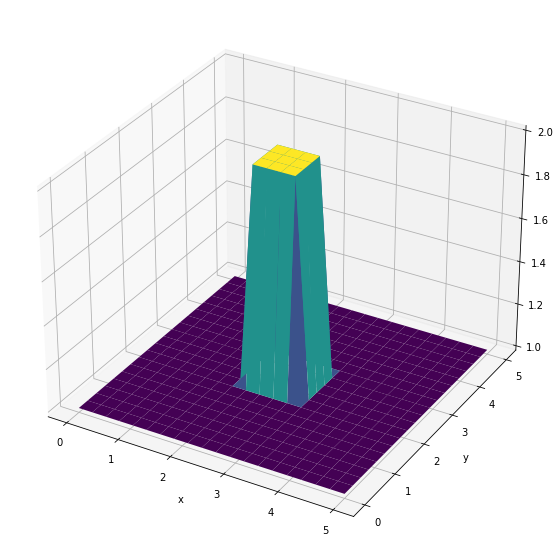

In [3]:
#constant 
nu = 0.4

x_max = 5
y_max = 5
nx = 20
ny = 20
dx = x_max / (nx)
dy = y_max / (ny)
T = 3
nt = 200
dt = T / nt
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)

# init u,v
u_init = np.ones((ny,nx))
v_init = np.ones((ny,nx))

u_init[int(2/dy):int(3/dy) , int(2/dx):int(3/dx)] = 2
v_init[int(2/dy):int(3/dy) , int(2/dx):int(3/dx)] = 2
#print(v_init)

#plot
u0 = u_init.copy()
v0 = v_init.copy()

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)


ax.set_xlabel('x')
ax.set_ylabel('y')



(1.0, 3.0)

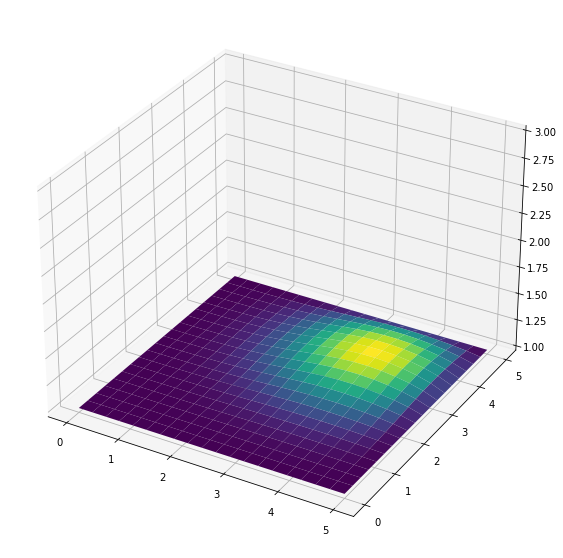

In [21]:
u0 =u_init.copy()
v0 =v_init.copy()


# finite difference
for _ in range(60):
    u = u0.copy()
    v = v0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]) + nu * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + nu * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
            v0[i,j] = v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]) + nu * (dt/dx**2) *(v[i+1,j] -2*v[i,j]+v[i-1,j]) + nu * (dt/dy**2) *(v[i,j+1]-2*v[i,j]+v[i,j-1])

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)
ax.set_zlim(1,3)


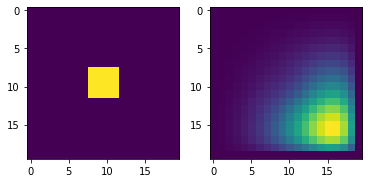

In [10]:
u0 = u_init.copy()
v0 = v_init.copy()

# heat map check 
for _ in range(nt):
    u = u0.copy()
    v = v0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]) + nu * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + nu * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
            v0[i,j] = v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]) + nu * (dt/dx**2) *(v[i+1,j] -2*v[i,j]+v[i-1,j]) + nu * (dt/dy**2) *(v[i,j+1]-2*v[i,j]+v[i,j-1])

plt.subplot(1,2,1)
plt.imshow(u_init)
plt.subplot(1,2,2)
plt.imshow(u0)

MovieWriter ffmpeg unavailable; using Pillow instead.


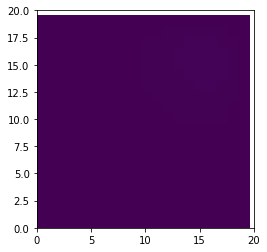

In [23]:
# animate

u0 =u_init.copy()
v0 =v_init.copy()

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, nx), ylim=(0, ny))
line = plt.imshow(u0)


def animate(frames):
    u = u0.copy()
    v = v0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]) + nu * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + nu * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
            v0[i,j] = v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]) + nu * (dt/dx**2) *(v[i+1,j] -2*v[i,j]+v[i-1,j]) + nu * (dt/dy**2) *(v[i,j+1]-2*v[i,j]+v[i,j-1])
  
    # print(u0)              
    line.set_data(u0)
    return line

anim = animation.FuncAnimation(fig, animate, frames=nt, repeat=False)
anim.save('2d con-fus.gif', fps = 20)


